# Concrete compressive strength Regression Model

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [54]:
data = pd.read_excel("Concrete_Data.xls")
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [55]:
features = data.iloc[:,:-1]
features.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


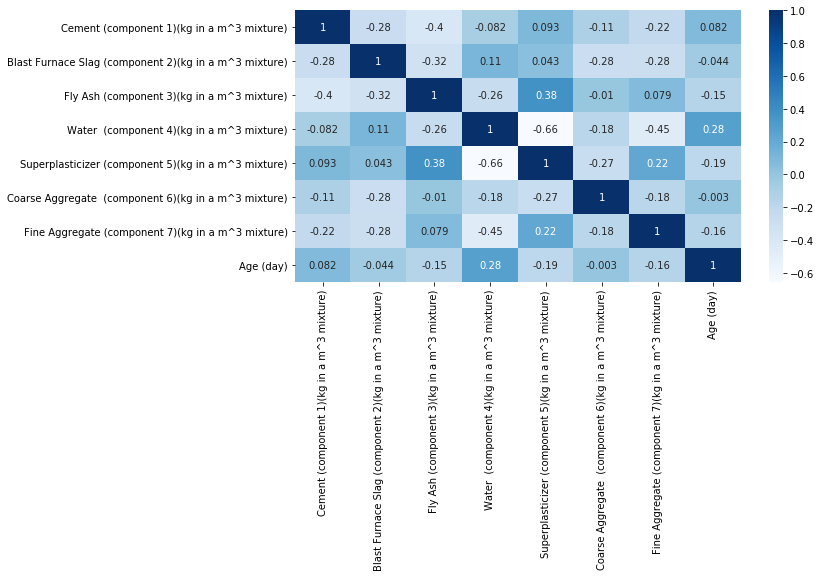

In [56]:
plt.figure(figsize=(10,5))
sns.heatmap(features.corr(), cmap ='Blues', annot = True)

In [57]:
features.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
dtype: int64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [59]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [60]:
X = features.copy().values
y = data.iloc[:,-1].values

train_X, test_X, train_y, test_y = train_test_split(X,y, random_state = 1)

# Selecting the best Regression Model
## 1. Linear Regression Model
## 2. Support Vector Regression Model
## 3. BayesianRidge Regression Model
## 4. Random Forest Regression Model
## 5. Decision Tree Regression Model

# 

## 1. Linear Regression Model

In [61]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(train_X, train_y)
predict_y = lr_model.predict(test_X)

#take a glimpse of your prediction
# print(test_y[:5])
# print(predict_y[:5])

## 2. Support Vector Regression Model

In [62]:
from sklearn.svm import SVR
svr_model = SVR(C=0.8, kernel = 'linear')
svr_model.fit(train_X, train_y)
predict_y = svr_model.predict(test_X)

#take a glimpse of your prediction
# print(test_y[:5])
# print(predict_y[:5])

## 3. BayesianRidge Regression Model

In [63]:
from sklearn.linear_model import BayesianRidge
br_model = BayesianRidge(compute_score = True)
br_model.fit(train_X, train_y)
predict_y = br_model.predict(test_X)

#take a glimpse of your prediction
# print(test_y[:5])
# print(predict_y[:5])

## 4. Random Forest Regression Model

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(train_X,train_y)
predict_y = rf_model.predict(test_X)

#take a glimpse of your prediction
# print(test_y[:5])
# print(predict_y[:5])

## 5. Decision Tree Regression Model

In [65]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1)
dt_model.fit(train_X,train_y)
predict_y = dt_model.predict(test_X)

#take a glimpse of your prediction
# print(test_y[:5])
# print(predict_y[:5])

# Mean Absolute Error

In [66]:
models = [lr_model, svr_model, br_model, rf_model, dt_model]
model_names = ['Linear Regression Model', 'Support Vector Regression Model', 'BayesianRidge Regression Model', 'Random Forest Regression Model', 'Decision Tree Regression Model']
for model,model_name in zip(models,model_names):
    mae = mean_absolute_error(model.predict(test_X),test_y)
    print(f"{model_name} MEA = {mae}")


Linear Regression Model MEA = 8.585962509607885
Support Vector Regression Model MEA = 8.758399704152245
BayesianRidge Regression Model MEA = 8.580243667599818
Random Forest Regression Model MEA = 3.5662765425900824
Decision Tree Regression Model MEA = 4.428867665445173


# Accuracy Score

In [67]:
for model,model_name in zip(models,model_names):
    accuracy = model.score(test_X,test_y)
    print(f"{model_name} accuracy score = {accuracy}")

Linear Regression Model accuracy score = 0.5546398295075139
Support Vector Regression Model accuracy score = 0.46223619287664497
BayesianRidge Regression Model accuracy score = 0.556892692037841
Random Forest Regression Model accuracy score = 0.89861517807482
Decision Tree Regression Model accuracy score = 0.8165167012564334


# Plotting Actual vs Prediction

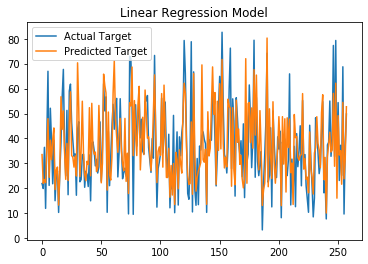

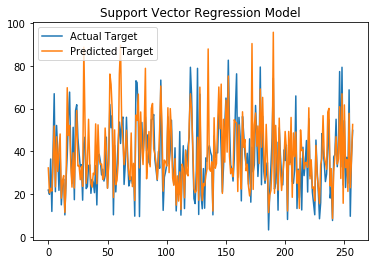

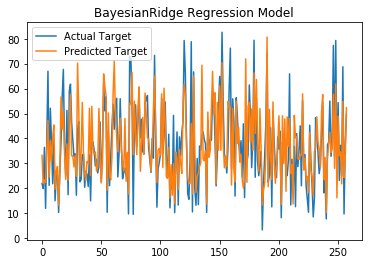

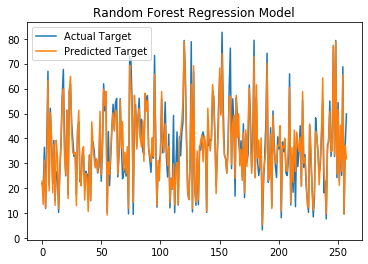

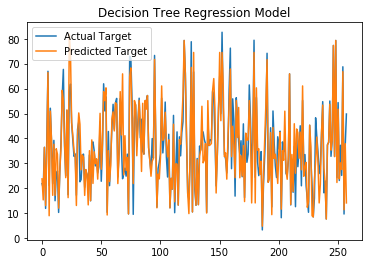

In [68]:
for model,model_name in zip(models,model_names):
    plt.plot(test_y, label = 'Actual Target')
    plt.plot(model.predict(test_X), label = 'Predicted Target')
    plt.legend(loc = 'upper left')
    plt.title(model_name)
    plt.show()